In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Import the csv data as Pandas data frame

In [5]:
df=pd.read_csv('/Users/ruchideshmukh/Library/Mobile Documents/com~apple~CloudDocs/ml end to end/Notebook/StudentsPerformance.csv')

# Show top 5 records


In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Shape of the dataset

In [7]:
df.shape

(1000, 8)

# 2.2 Dataset Information
. gender :sex of the students-> (Male/female)

. race/ethnicity: ethnicity of students ->(Group A,B,C,D,E)

. Parental level of education:parent's final education ->(bachelor's degree,some college,master's degree,associates's degree,high school)

. lunch: having lunch before test(standard or free/reduced)

. test preparation course: complete or not complete before test

. math score

. reading score

. writing score


# 3. Data checks to perform
. Check for missing values

. Check Duplicates

. Check data type

. Check the number of unique values of each column 

. Check statistics of dataset

. Check various categories present in the different categorical column


# 3.1 Check Missing values

In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# There are no missing values in the data set

# 3.2 Check Duplicates

In [9]:
df.duplicated().sum()

0

# There are no duplicate values in the dataset

# Check data types

In [10]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 3.4 Checking the number of unique values of each column

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# 3.5 Check statistics of data set

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Insight
. From above description,all means are very close to each other- between 66 and 68.05;

. All standard deviations are also close - between 14.6 and 15.19;

. While there is a minimum score 0 for math,for writing minimum is much higher = 10 and for reading is 17

# 3.6 Exploring Data

In [14]:
print("Categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:   ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:   ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:   ",end=" ")
print(df['test preparation course'].unique())






Categories in 'gender' variable:    ['female' 'male']
Categories in 'race/ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test preparation course' variable:    ['none' 'completed']


In [15]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#Print columns
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features :{}'.format(len(categorical_features),categorical_features))  

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features :['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


# 3.8 Adding columns for "Total Score" and "Average"

In [16]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score'] 
df['average'] = df['total score']/3
df.head() 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading score'] == 100]['average'].count() 
writing_full = df[df['writing score'] == 100]['average'].count() 
math_full = df[df['math score'] == 100]['average'].count() 

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in writing: {writing_full}')
print(f'Number of students with full marks in reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


In [18]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in math: {math_less_20}')
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')

Number of students with less than 20 marks in math: 4
Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3


# Insights
From the above values students have performed worst in maths.
Best performance is in reading.

# 4. Exploring Data(Visualisation)

4.1 Visualise average score distribution to make some conclusion.

. Histogram

. Kernel Distribution Function


# 4.1.1 Histogram & KDE
 
 

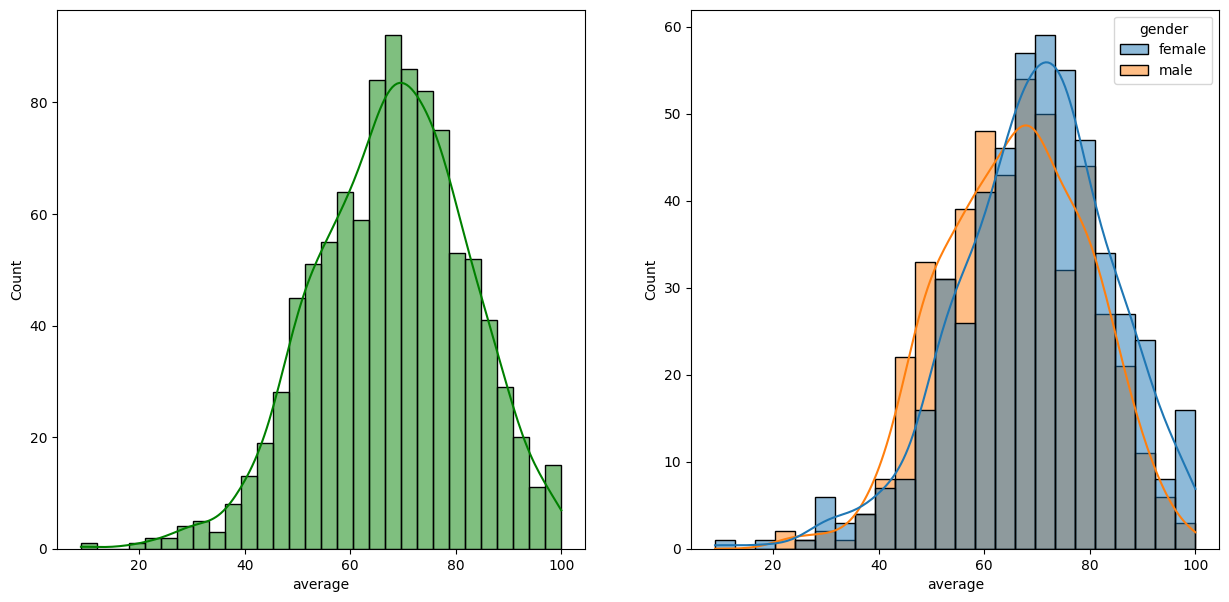

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

  # Insights

  . Female students tend to perform well than male students

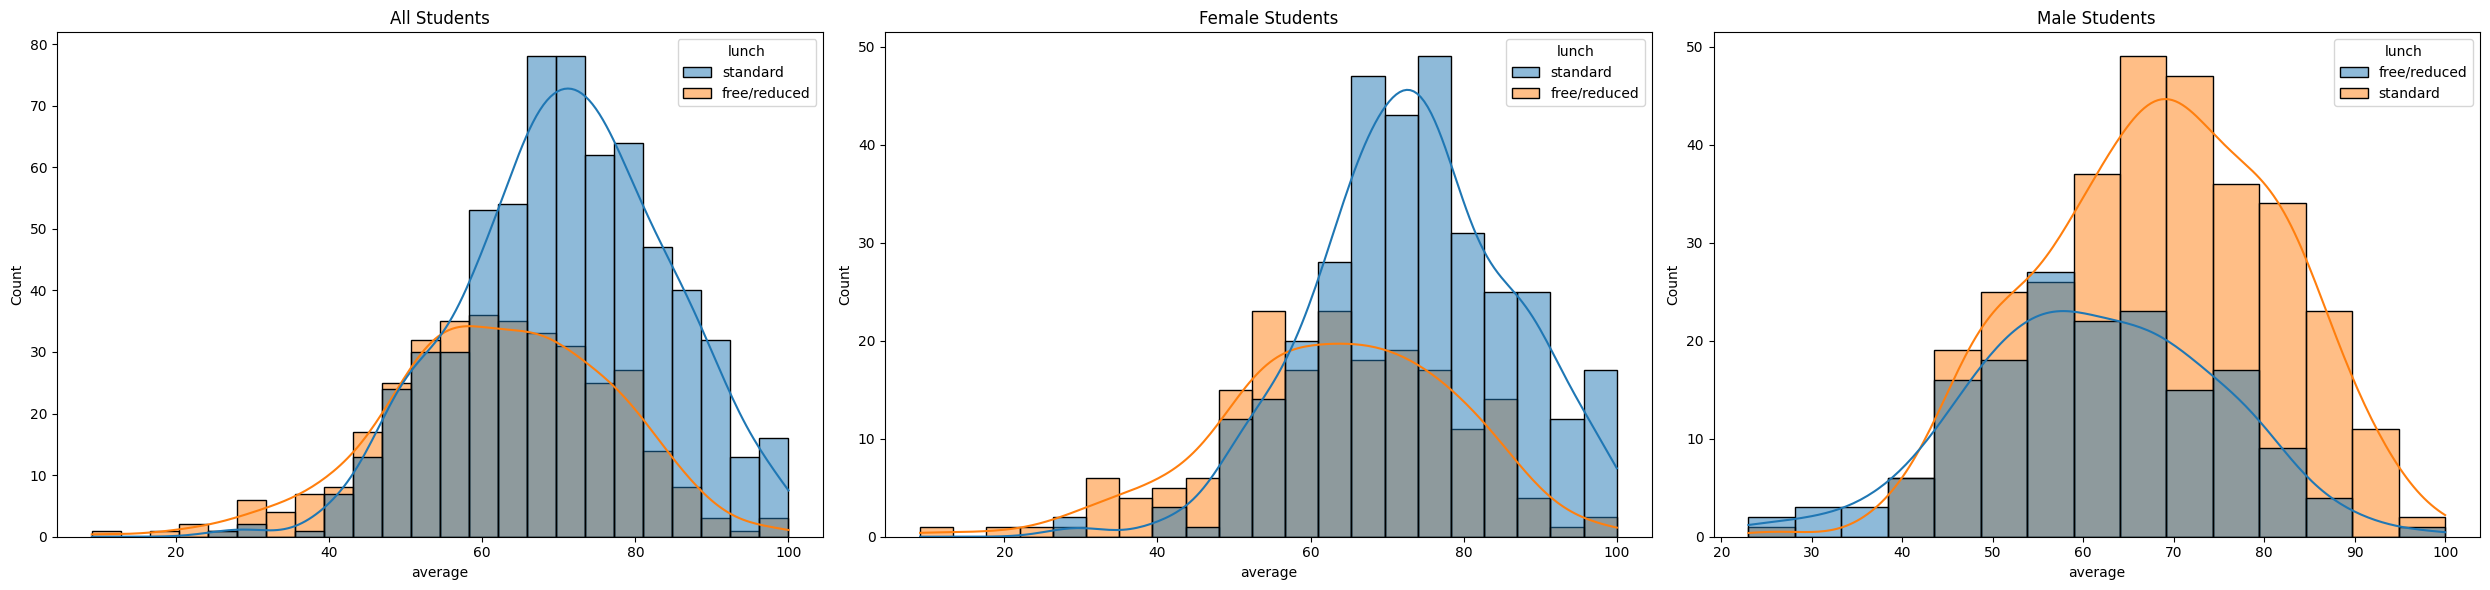

In [23]:
# Create a figure and axes
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# First subplot
sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axes[0])
axes[0].set_title('All Students')

# Second subplot
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch', ax=axes[1])
axes[1].set_title('Female Students')

# Third subplot
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch', ax=axes[2])
axes[2].set_title('Male Students')

# Show the plot
plt.tight_layout()
plt.show()

# Insights

. Standard lunch helps perfom well in exams.

. Standard lunch helps perform well in exams be it male or female.

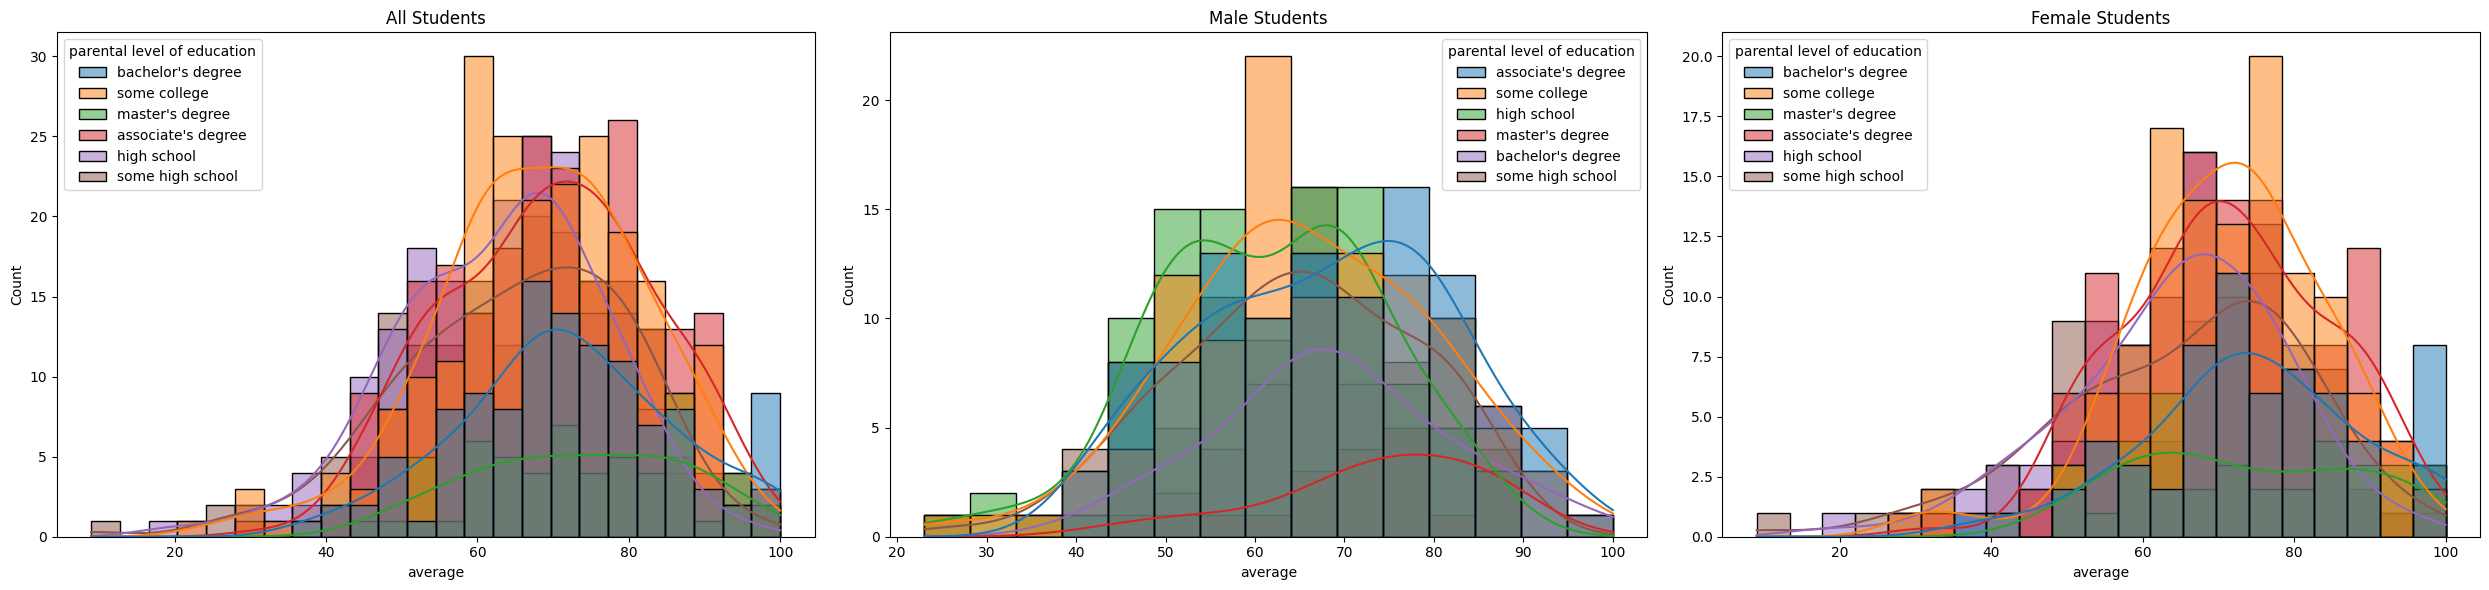

In [25]:
# Create a figure and axes
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# First subplot
sns.histplot(data=df, x='average', kde=True, hue='parental level of education', ax=axes[0])
axes[0].set_title('All Students')

# Second subplot
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental level of education', ax=axes[1])
axes[1].set_title('Male Students')

# Third subplot
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental level of education', ax=axes[2])
axes[2].set_title('Female Students')

# Show the plot
plt.tight_layout()
plt.show()

# Insights

.In average parental level of education doesn't help student perform well in the exam.

. 2nd graph shows that parents who have assocaite's degree their male child tend to perform well in exam.

. 3rd graph shows that there is no affect of parental level of education  in female child performance.


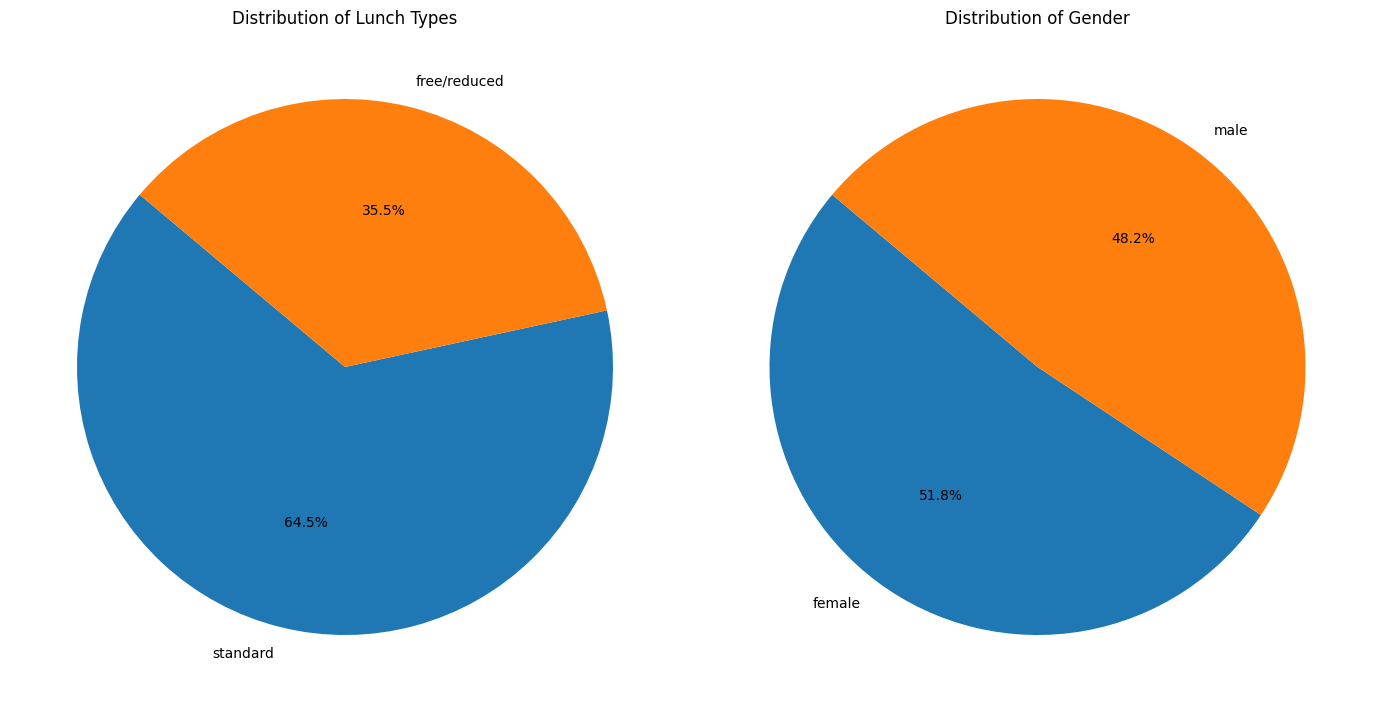

In [26]:
# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for lunch distribution
lunch_counts = df['lunch'].value_counts()
axes[0].pie(lunch_counts, labels=lunch_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Distribution of Lunch Types')

# Pie chart for gender distribution
gender_counts = df['gender'].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Distribution of Gender')

# Show the plot
plt.tight_layout()
plt.show()

# Insights

.Pie chart shows that there is equal distribution of lunch between male and female.

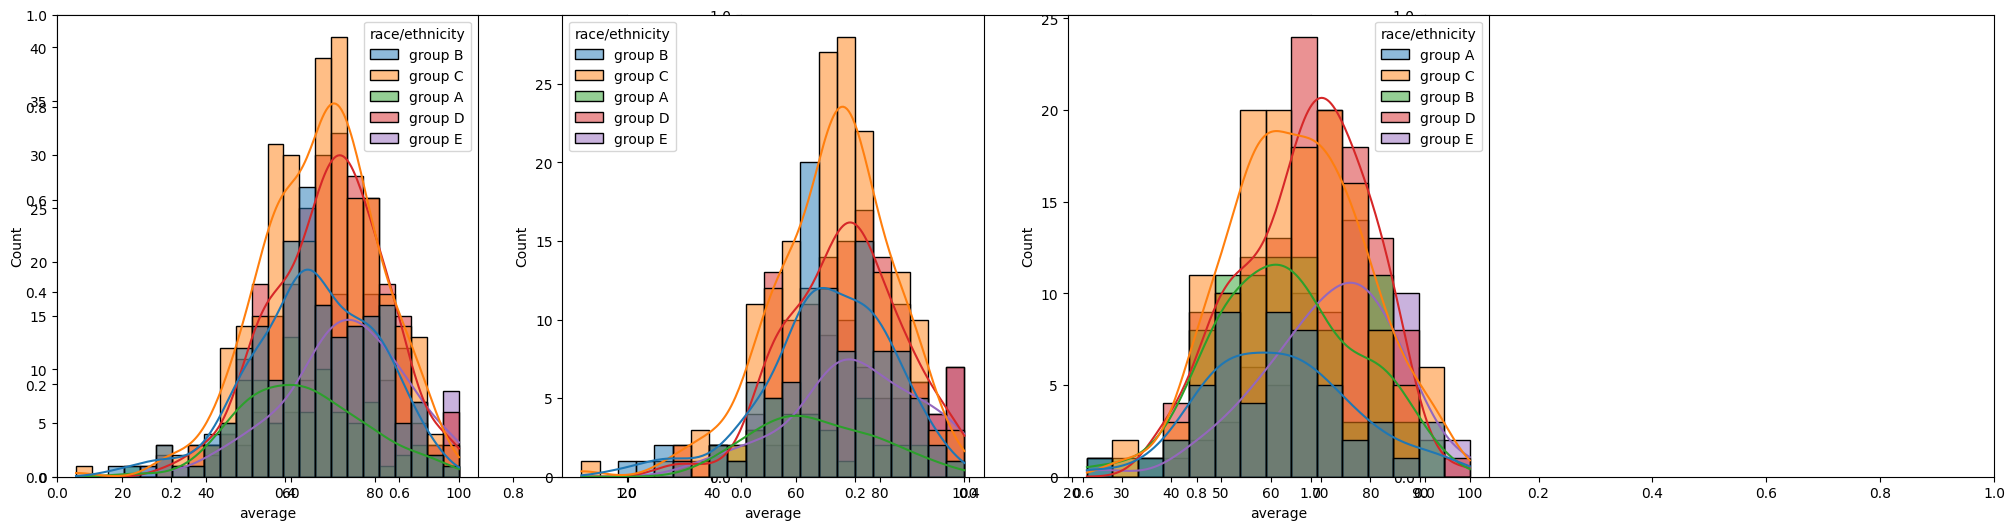

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

# Insights
Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

# 4.2 Maximumum score of students in all three subjects

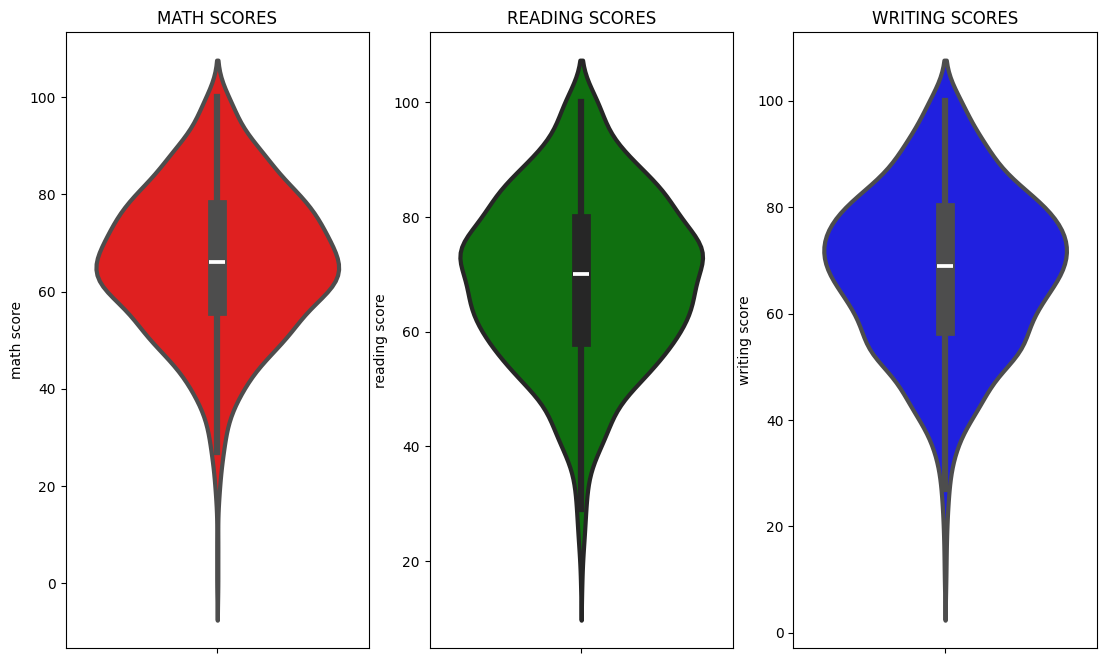

In [28]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()


# Insights

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

# 5. Conclusions

Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers